# Multi-armed bandit
### Thompson sampling with success probability constraint and stochastic rewards

In [2]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams.update({'font.size': 30, 
                     'lines.linewidth' : 3,
                     'lines.markersize': 20})

# Load Data

In [30]:
#filename = 'RESULT_SNR_15_TARGET_0.3_DELAY_16'
#filename = 'RESULT_SNR_10_TARGET_0.1_DELAY_0'
filename = 'RESULT_SNR_10_TARGET_0.1_DELAY_16'
#filename = 'RESULT_SNR_15_TARGET_0.1_DELAY_0'

data = np.load(filename + '.npy', allow_pickle=True)[()]

In [31]:
olla_mcs, olla_ack, olla_tput = data['olla']
ts_mcs, ts_ack, ts_tput       = data['ts']
ts_infp_mcs, ts_infp_ack, ts_infp_tput = data['ts_infp']

In [26]:
plt.rcParams.update({'font.size': 30, 
                     'lines.linewidth' : 5,
                     'lines.markersize': 20})

interval = 20

plt_filename_prefix = 'plots/' + '_'.join( filename.split('.'))

In [27]:
np.array(olla_tput).shape

(2000, 1000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


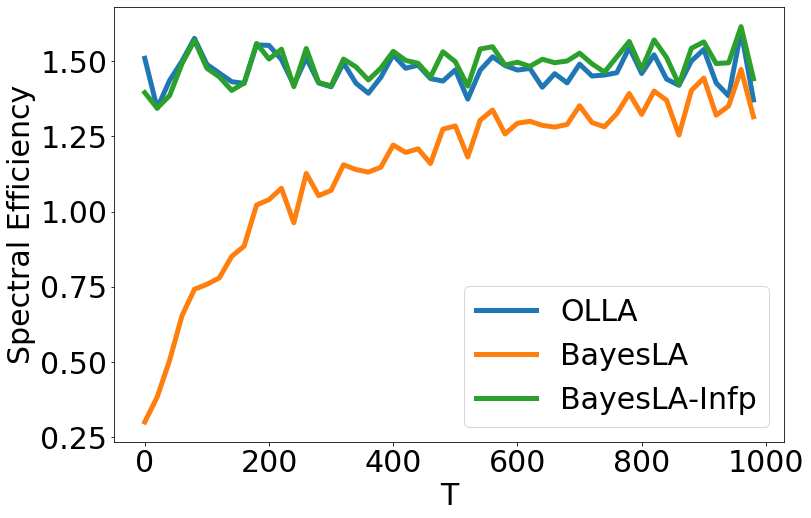

In [28]:
plt.figure( figsize = [12, 8])

x = np.arange( int( np.array(olla_tput).shape[1] / interval ) ) * interval

plt.plot(x, np.mean(np.array(olla_tput)[:, ::interval] / (72 * 15), axis=0))
plt.plot(x, np.mean(np.array(ts_tput)[:, ::interval] / (72 * 15), axis=0))
plt.plot(x, np.mean(np.array(ts_infp_tput)[:, ::interval] / (72 * 15), axis=0))

plt.legend(['OLLA', 'BayesLA', 'BayesLA-Infp'])

plt.xlabel('T')
plt.ylabel('Spectral Efficiency')

plt.savefig(plt_filename_prefix + '_tput.eps', bbox_inches='tight')
plt.savefig(plt_filename_prefix + '_tput.png', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


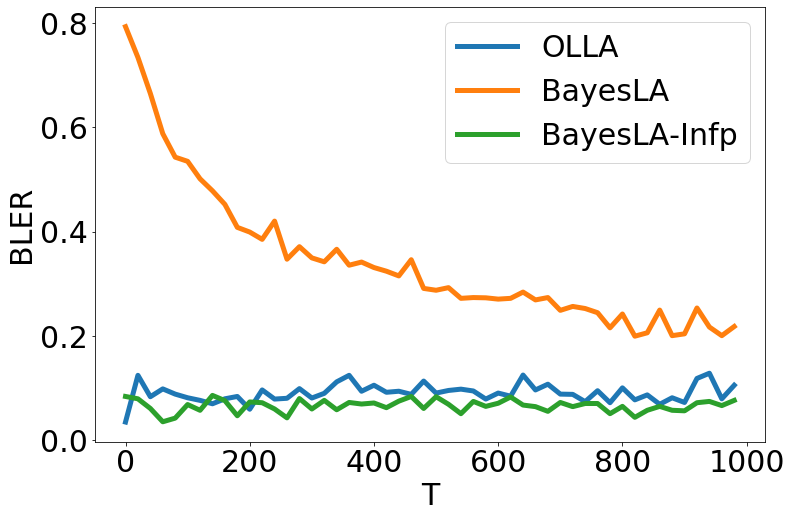

In [29]:
plt.figure( figsize = [12, 8])

plt.plot(x, 1.0 - np.mean(np.array(olla_ack)[:, ::interval], axis=0))
plt.plot(x, 1.0 - np.mean(np.array(ts_ack)[:, ::interval], axis=0))
plt.plot(x, 1.0 - np.mean(np.array(ts_infp_ack)[:, ::interval], axis=0))

plt.legend(['OLLA', 'BayesLA', 'BayesLA-Infp'])

plt.xlabel('T')
plt.ylabel('BLER')

plt.savefig(plt_filename_prefix + '_bler.eps', bbox_inches='tight')
plt.savefig(plt_filename_prefix + '_bler.png', bbox_inches='tight')